In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
from pathlib import Path

In [3]:
import glob
import geopandas as gpd

In [4]:
import numpy as np

In [5]:
import pandas as pd
from scipy.stats import mode

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from matplotlib.ticker import FuncFormatter

In [8]:
if not os.path.exists('/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA'):
  os.makedirs('/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA')

Path('./').mkdir(parents=True, exist_ok=True)

In [9]:
if not os.path.exists('/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRITIVA'):
  os.makedirs('/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRITIVA')

Path('./').mkdir(parents=True, exist_ok=True)

In [10]:
files_path = '/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/04_MUNICIPIOS_IBGE/AGREGACAO_POR_SETOR/*shp'
files_list = glob.glob(files_path)
print(len(files_list))
files_list

5


['/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/04_MUNICIPIOS_IBGE/AGREGACAO_POR_SETOR/Agropecuária.shp',
 '/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/04_MUNICIPIOS_IBGE/AGREGACAO_POR_SETOR/Energia.shp',
 '/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/04_MUNICIPIOS_IBGE/AGREGACAO_POR_SETOR/Mudança_de_Uso_da_Terra_e_Floresta.shp',
 '/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/04_MUNICIPIOS_IBGE/AGREGACAO_POR_SETOR/Processos_Industriais.shp',
 '/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/04_MUNICIPIOS_IBGE/AGREGACAO_POR_SETOR/Resíduos.shp']

Análise Exploratória dos dados

In [11]:
# Lista de colunas com os anos
colunas_selecionadas = ['1997', '2003', '2010', '2015', '2023']

Estatísticas descritivas

In [12]:
# Inicializando dicionários para armazenar as tabelas
estatisticas = {
    "media": pd.DataFrame(),
    "mediana": pd.DataFrame(),
    "desvio_padrao": pd.DataFrame(),
    "moda": pd.DataFrame(),
}

In [13]:
# Loop para processar cada arquivo
for file in files_list:
    # Abrir o shapefile
    gdf = gpd.read_file(file)

    # Filtrar as colunas selecionadas
    gdf_filtrado = gdf[colunas_selecionadas]

    # Extrair o nome do setor
    setor = file.replace(
        '/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/04_MUNICIPIOS_IBGE/AGREGACAO_POR_SETOR/','').replace('.shp', '')

    # Calcular estatísticas para cada ano
    media = gdf_filtrado.mean()
    mediana = gdf_filtrado.median()
    desvio_padrao = gdf_filtrado.std()

    # Calcular a moda, tratando casos de múltiplos valores de moda
    moda = gdf_filtrado.apply(lambda x: mode(x, nan_policy='omit').mode[0] if isinstance(mode(x, nan_policy='omit').mode, np.ndarray) and len(mode(x, nan_policy='omit').mode) > 0 else None)

    # Criar um DataFrame com as estatísticas
    estatisticas_df = pd.DataFrame({
        'Média': media,
        'Mediana': mediana,
        'Desvio Padrão': desvio_padrao,
        'Moda': moda
    })

    # Salvar o DataFrame como CSV
    output_path = f'/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRITIVA/estat_descr_{setor}.csv'
    estatisticas_df.to_csv(output_path)

    print(f'Estatísticas para o setor {setor} salvas em: {output_path}')

Estatísticas para o setor Agropecuária salvas em: /content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRITIVA/estat_descr_Agropecuária.csv
Estatísticas para o setor Energia salvas em: /content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRITIVA/estat_descr_Energia.csv
Estatísticas para o setor Mudança_de_Uso_da_Terra_e_Floresta salvas em: /content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRITIVA/estat_descr_Mudança_de_Uso_da_Terra_e_Floresta.csv
Estatísticas para o setor Processos_Industriais salvas em: /content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRITIVA/estat_descr_Processos_Industriais.csv
Estatísticas para o setor Resíduos salvas em: /content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRIT

In [24]:
# Caminho para os arquivos CSV
csv_path = '/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRITIVA/*.csv'

# Usando glob para pegar todos os arquivos CSV no diretório
files_list = glob.glob(csv_path)

# Loop para carregar e exibir cada tabela
for file in files_list:
    # Carregar o arquivo CSV
    estatisticas_df = pd.read_csv(file)

    # Exibir o nome do arquivo e a tabela correspondente
    print(f"Tabela de estatísticas para o arquivo: {file}")
    print(estatisticas_df)
    print("\n" + "-"*50 + "\n")  # Separador entre as tabelas

Tabela de estatísticas para o arquivo: /content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRITIVA/estat_descr_Agropecuária.csv
   Unnamed: 0     Média   Mediana  Desvio Padrão  Moda
0        1997  342337.0  257663.3       296626.8   NaN
1        2003  542922.5  430256.5       428692.3   NaN
2        2010  630167.5  495354.4       473849.0   NaN
3        2015  686778.1  567992.2       504167.8   NaN
4        2023  926787.5  790993.8       658558.6   NaN

--------------------------------------------------

Tabela de estatísticas para o arquivo: /content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRITIVA/estat_descr_Energia.csv
   Unnamed: 0     Média  Mediana  Desvio Padrão  Moda
0        1997       0.0      0.0            0.0   NaN
1        2003       0.0      0.0            0.0   NaN
2        2010   93681.1  19946.0       214681.7   NaN
3        2015  149875.0  35973.0   

Identificação de outliers (valores atípicos)

In [14]:
# Definir o estilo para o gráfico
sns.set(style='whitegrid')


In [15]:
# Função para formatar os valores do eixo Y
formatter = FuncFormatter(lambda x, pos: f'{x / 1000:.0f}K')

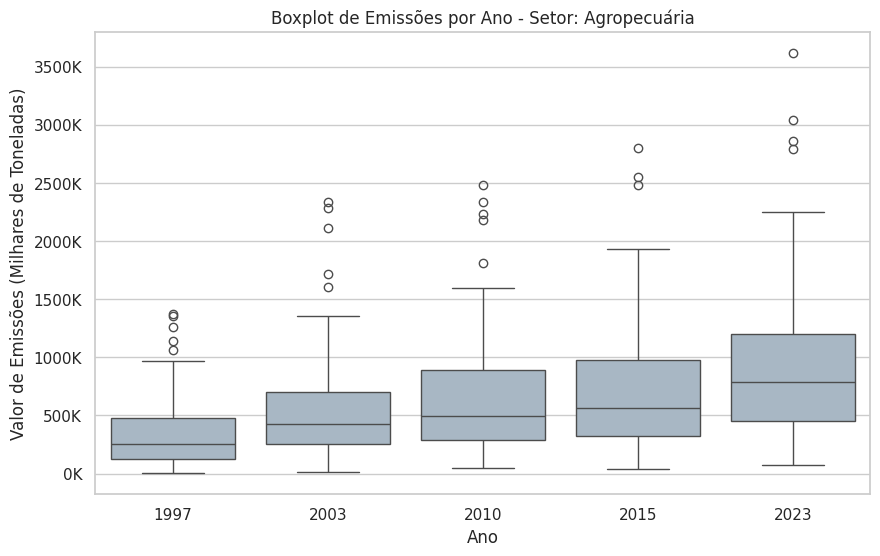

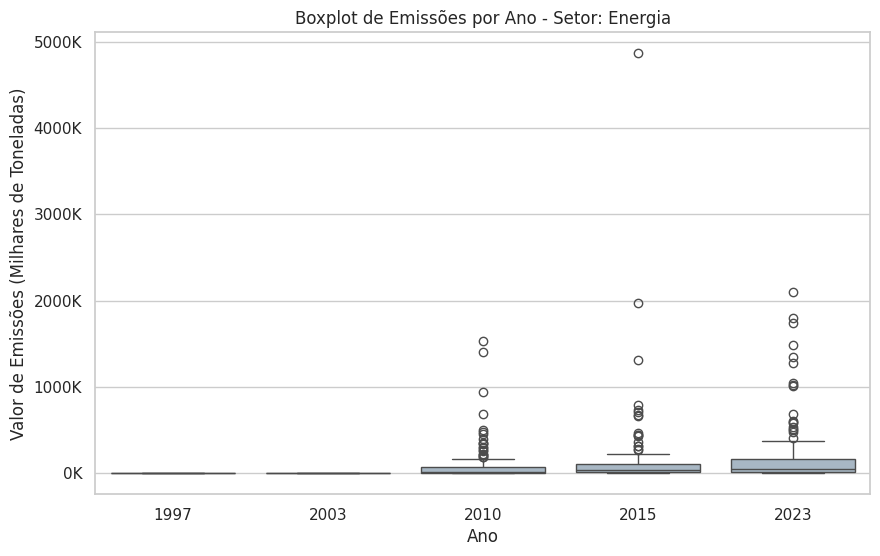

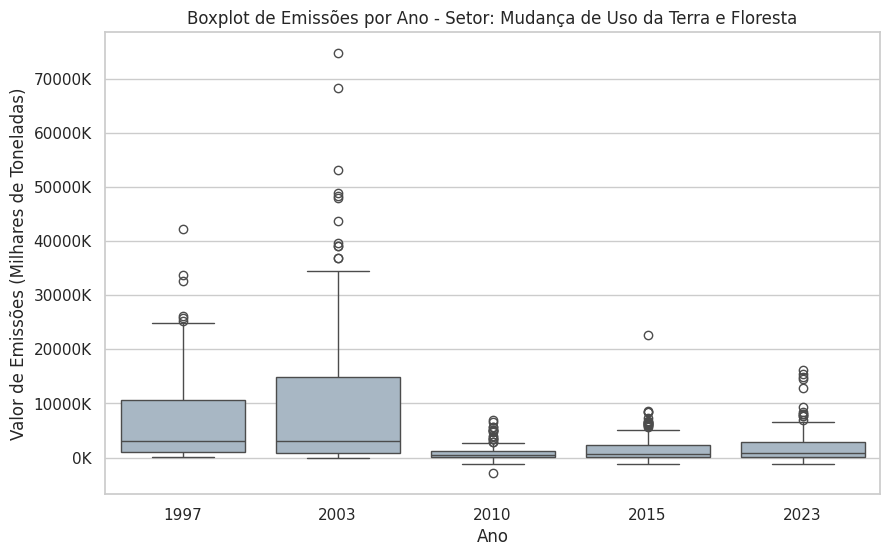

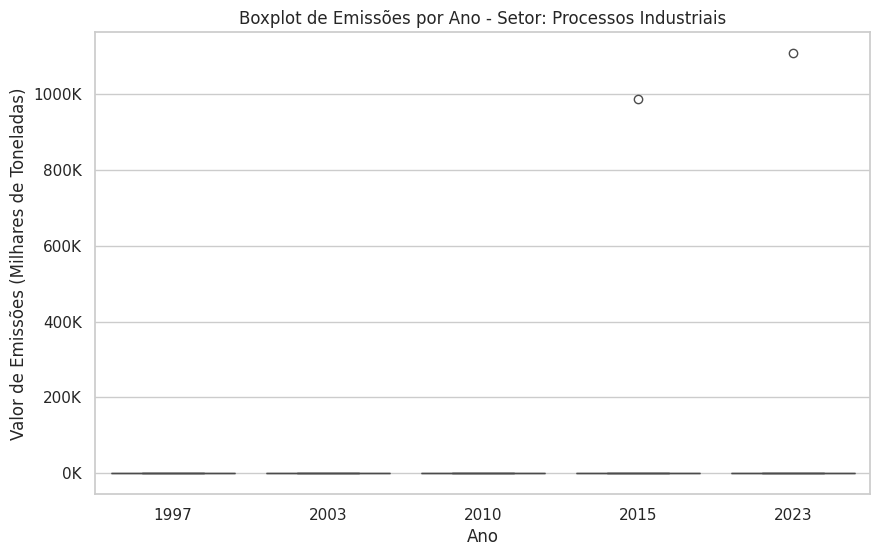

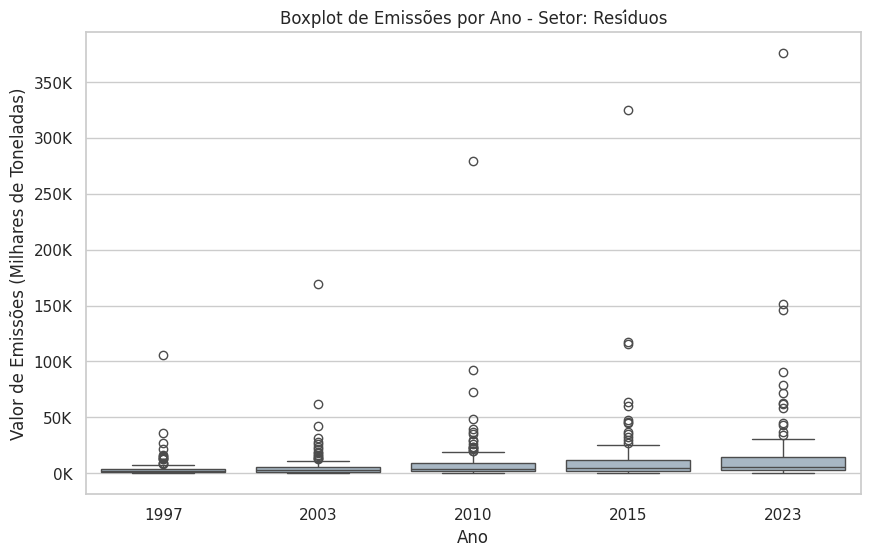

In [16]:
# Loop para processar cada arquivo
for file in files_list:
    # Abrir o shapefile
    gdf = gpd.read_file(file)

    # Filtrar as colunas selecionadas
    gdf_filtrado = gdf[colunas_selecionadas]

    # Extrair o nome do setor
    setor = file.replace('/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/04_MUNICIPIOS_IBGE/AGREGACAO_POR_SETOR/', '').replace('.shp', '').replace('_',' ')

    # Criar o gráfico de boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=gdf_filtrado, color="#a3b7c9")  # Azul acinzentado


    # Definir título e rótulos
    plt.title(f'Boxplot de Emissões por Ano - Setor: {setor}')
    plt.xlabel('Ano')
    plt.ylabel('Valor de Emissões (Milhares de Toneladas)')

    # Aplicar o formatador para o eixo y
    plt.gca().yaxis.set_major_formatter(formatter)


    # Salvar o gráfico
    output_path = f'/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/ESTATISTICA_DESCRITIVA/boxplot_{setor}.png'
    plt.savefig(output_path)


    # Exibir o gráfico
    plt.show()



In [17]:
# Função para identificar e substituir outliers
def substituir_outliers(gdf, colunas):
    for coluna in colunas:
        # Calcular o primeiro e terceiro quartil (Q1 e Q3)
        Q1 = gdf[coluna].quantile(0.25)
        Q3 = gdf[coluna].quantile(0.75)
        IQR = Q3 - Q1

        # Identificar os outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Substituir os valores fora dos limites por NaN
        gdf.loc[(gdf[coluna] < limite_inferior) | (gdf[coluna] > limite_superior), coluna] = pd.NA

    return gdf

In [19]:
if not os.path.exists('/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/OUTLIERS'):
  os.makedirs('/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/OUTLIERS')

Path('./').mkdir(parents=True, exist_ok=True)

In [20]:
# Loop para processar cada arquivo
for file in files_list:
    # Abrir o shapefile
    gdf = gpd.read_file(file)

    # Filtrar as colunas selecionadas
    gdf_filtrado = gdf[colunas_selecionadas]

    # Substituir outliers por NaN
    gdf_sem_outliers = substituir_outliers(gdf_filtrado, colunas_selecionadas)

    # Atualizar o GeoDataFrame original com os valores de NaN
    gdf[colunas_selecionadas] = gdf_sem_outliers

    # Extrair o nome do setor
    setor = file.replace(
        '/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/04_MUNICIPIOS_IBGE/AGREGACAO_POR_SETOR/', '').replace('.shp', '')

    # Salvar o novo shapefile com os outliers substituídos por NaN
    output_path = f'/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/05_ANALISE_EXPLORATORIA/AED/OUTLIERS/{setor}_sem_outliers.shp'
    gdf.to_file(output_path)